## Huzaifa Awan
## Zain-ul-Abidin


### Step 1 Feature Extraction

In [38]:
import pandas as pd

# Define the file path
file_path = r"D:\Uni\Semester 6\aiproject2\Dataset\cv-valid-train.csv"  # Replace this with the actual file path

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify that it was loaded correctly
print(data.head())


                           filename  \
0  cv-valid-train/sample-000000.mp3   
1  cv-valid-train/sample-000001.mp3   
2  cv-valid-train/sample-000002.mp3   
3  cv-valid-train/sample-000003.mp3   
4  cv-valid-train/sample-000004.mp3   

                                                text  up_votes  down_votes  \
0  learn to recognize omens and follow them the o...         1           0   
1         everything in the universe evolved he said         1           0   
2  you came so that you could learn about your dr...         1           0   
3  so now i fear nothing because it was those ome...         1           0   
4  if you start your emails with greetings let me...         3           2   

   age gender accent  duration  
0  NaN    NaN    NaN       NaN  
1  NaN    NaN    NaN       NaN  
2  NaN    NaN    NaN       NaN  
3  NaN    NaN    NaN       NaN  
4  NaN    NaN    NaN       NaN  


In [39]:
import pandas as pd
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress tracking

In [40]:
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    
    # Extract pitch (fundamental frequency)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = np.mean(pitches[pitches > 0])
    
    # Extract formant-like features using librosa.effects
    # Here, we'll compute the spectral centroid, bandwidth, and contrast as formant-like features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    
    # Extract intensity (RMS energy)
    rms = librosa.feature.rms(y=y)
    intensity = np.mean(rms)
    
    # Extract duration
    duration = librosa.get_duration(y=y, sr=sr)
    
    return pitch, spectral_centroid, spectral_bandwidth, spectral_contrast, intensity, duration


In [41]:
# Define the file paths
csv_file_path = r"D:\Uni\Semester 6\aiproject2\Dataset\cv-valid-train.csv"  # Replace with the actual CSV file path
audio_folder_path = r"D:\Uni\Semester 6\aiproject2\Dataset"   # Replace with the folder containing audio files

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)




In [42]:
# Convert age categories to numerical values (e.g., 'teens' to 0, 'twenties' to 1, etc.)
age_numerical = {
    'teens': 0,
    'twenties': 1,
    'thirties': 2,
    'fourties': 3,
    'fifties': 4,
    'sixties': 5,
    'seventies': 6,
    'eighties': 7,
    'nineties': 8
}

# Convert the age labels to numerical values
y = np.array([age_numerical[age] for age in data['age'] if not pd.isnull(age)])


In [43]:
# Initialize lists to store extracted features
pitch_list = []
spectral_centroid_list = []
spectral_bandwidth_list = []
spectral_contrast_list = []
intensity_list = []
duration_list = []

In [44]:
for index, row in tqdm(data.iterrows(), total=len(data), desc="Extracting Features"):
    # Check if age value is not null
    if not pd.isnull(row['age']):
        audio_file_path = os.path.join(audio_folder_path, row['filename'])
        pitch, spectral_centroid, spectral_bandwidth, spectral_contrast, intensity, duration = extract_features(audio_file_path)
        pitch_list.append(pitch)
        spectral_centroid_list.append(spectral_centroid)
        spectral_bandwidth_list.append(spectral_bandwidth)
        spectral_contrast_list.append(spectral_contrast)
        intensity_list.append(intensity)
        duration_list.append(duration)

Extracting Features: 100%|██████████| 15001/15001 [07:05<00:00, 35.29it/s]


In [45]:
# Create data frames for the extracted features
features_df = pd.DataFrame({
    'Pitch': pitch_list,
    'Spectral Centroid': spectral_centroid_list,
    'Spectral Bandwidth': spectral_bandwidth_list,
    'Spectral Contrast': spectral_contrast_list,
    'Intensity': intensity_list,
    'Duration': duration_list
})

In [46]:
# Visualize the extracted features using plots
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, 'Frequency')

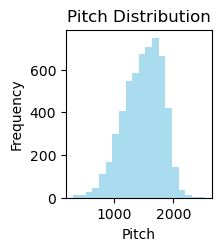

In [47]:
plt.subplot(2, 3, 1)
plt.hist(features_df['Pitch'], bins=20, color='skyblue', alpha=0.7)
plt.title('Pitch Distribution')
plt.xlabel('Pitch')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

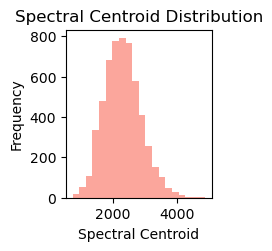

In [48]:
plt.subplot(2, 3, 2)
plt.hist(features_df['Spectral Centroid'], bins=20, color='salmon', alpha=0.7)
plt.title('Spectral Centroid Distribution')
plt.xlabel('Spectral Centroid')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

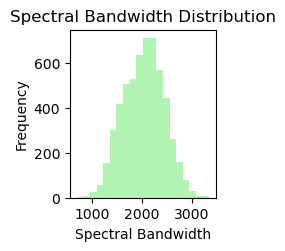

In [49]:
plt.subplot(2, 3, 3)
plt.hist(features_df['Spectral Bandwidth'], bins=20, color='lightgreen', alpha=0.7)
plt.title('Spectral Bandwidth Distribution')
plt.xlabel('Spectral Bandwidth')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

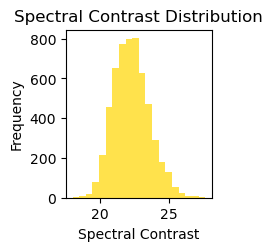

In [50]:
plt.subplot(2, 3, 4)
plt.hist(features_df['Spectral Contrast'], bins=20, color='gold', alpha=0.7)
plt.title('Spectral Contrast Distribution')
plt.xlabel('Spectral Contrast')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

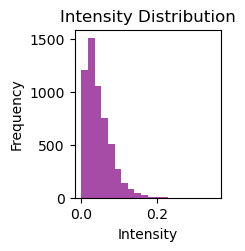

In [51]:
plt.subplot(2, 3, 5)
plt.hist(features_df['Intensity'], bins=20, color='purple', alpha=0.7)
plt.title('Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

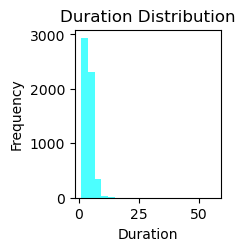

In [52]:
plt.subplot(2, 3, 6)
plt.hist(features_df['Duration'], bins=20, color='cyan', alpha=0.7)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Step 2 Data Preprocessing:

In [54]:
# Step 1: Evaluate the data for missing values
missing_values = features_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Pitch                 0
Spectral Centroid     0
Spectral Bandwidth    0
Spectral Contrast     0
Intensity             0
Duration              0
dtype: int64


In [55]:
# Step 2: Fix missing values using mean imputation
features_df.fillna(features_df.mean(), inplace=True)
# Step 3: Normalize or scale the extracted features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_df.columns)
# Display the preprocessed data
print("\nPreprocessed Data:")
print(scaled_features_df.head())


Preprocessed Data:
      Pitch  Spectral Centroid  Spectral Bandwidth  Spectral Contrast  \
0 -0.804182          -0.827901           -0.361183           0.823722   
1  0.402642           0.172066           -0.265555          -0.157617   
2  0.611793          -0.783228           -1.636915           2.498352   
3 -2.112926          -0.798883           -0.346013           0.395982   
4 -1.674233          -0.684680            0.524234          -1.731111   

   Intensity  Duration  
0  -1.107768  1.019516  
1  -0.869747 -1.314697  
2  -0.195347  0.104950  
3  -0.364713  0.760154  
4   0.008064 -0.181729  


### Step 3 Model Training

In [56]:
# Define the linear regression model
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the scaled features as input and age labels as target variables
model.fit(scaled_features, y)  # Corrected from 'ages' to 'y'

# Make predictions
predictions = model.predict(scaled_features)

# Display some sample predictions
print("Sample Predictions:")
for i in range(5):
    print("Predicted Age:", predictions[i], "Actual Age:", y[i])


Sample Predictions:
Predicted Age: 2.4985723724432187 Actual Age: 1
Predicted Age: 2.0119049873612553 Actual Age: 6
Predicted Age: 2.230608843290591 Actual Age: 2
Predicted Age: 2.2713409992682414 Actual Age: 5
Predicted Age: 2.1301647855649617 Actual Age: 4


### Step 4

In [58]:
# Load the new CSV file and extract features from corresponding audio files
new_csv_file_path = r"D:\Uni\Semester 6\aiproject2\Dataset\cv-valid-test.csv"  # Replace with the path to the new CSV file
new_audio_folder_path = r"D:\Uni\Semester 6\aiproject2\Dataset"  # Replace with the path to the new audio folder


In [59]:
# Read the new CSV file into a DataFrame
new_data = pd.read_csv(new_csv_file_path)

# Initialize lists to store extracted features and corresponding age labels
new_features_list = []
new_labels_list = []

In [60]:
# Iterate through the rows of the new DataFrame with progress tracking
for index, row in tqdm(new_data.iterrows(), total=len(new_data), desc="Extracting Features from New Data"):
    # Check if age value is not null
    if not pd.isnull(row['age']):
        audio_file_path = os.path.join(new_audio_folder_path, row['filename'])
        # Extract features from audio file
        features = extract_features(audio_file_path)
        new_features_list.append(features)
        # Convert age categories to numerical values
        age_numerical = {
            'teens': 0,
            'twenties': 1,
            'thirties': 2,
            'fourties': 3,
            'fifties': 4,
            'sixties': 5,
            'seventies': 6,
            'eighties': 7,
            'nineties': 8
        }[row['age']]
        new_labels_list.append(age_numerical)


Extracting Features from New Data: 100%|██████████| 3995/3995 [02:04<00:00, 32.08it/s]


In [61]:
# Convert lists to NumPy arrays
new_features = np.array(new_features_list)
new_labels = np.array(new_labels_list)

In [62]:
# Make predictions using the trained model on the new set of features
new_predictions = model.predict(new_features)


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics: MSE, MAE, and R-squared for the new data
new_mse = mean_squared_error(new_labels, new_predictions)
new_mae = mean_absolute_error(new_labels, new_predictions)
new_r2 = r2_score(new_labels, new_predictions)

In [65]:
print("Mean Squared Error (MSE) for New Data:", new_mse)
print("Mean Absolute Error (MAE) for New Data:", new_mae)
print("R-squared (R^2) Coefficient of Determination for New Data:", new_r2)

Mean Squared Error (MSE) for New Data: 74299.40674461098
Mean Absolute Error (MAE) for New Data: 270.1896267595699
R-squared (R^2) Coefficient of Determination for New Data: -33796.88671993855


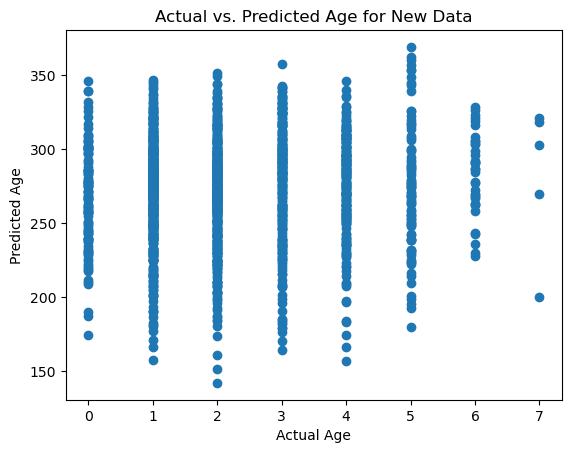

In [66]:
plt.scatter(new_labels, new_predictions)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age for New Data')
plt.show()

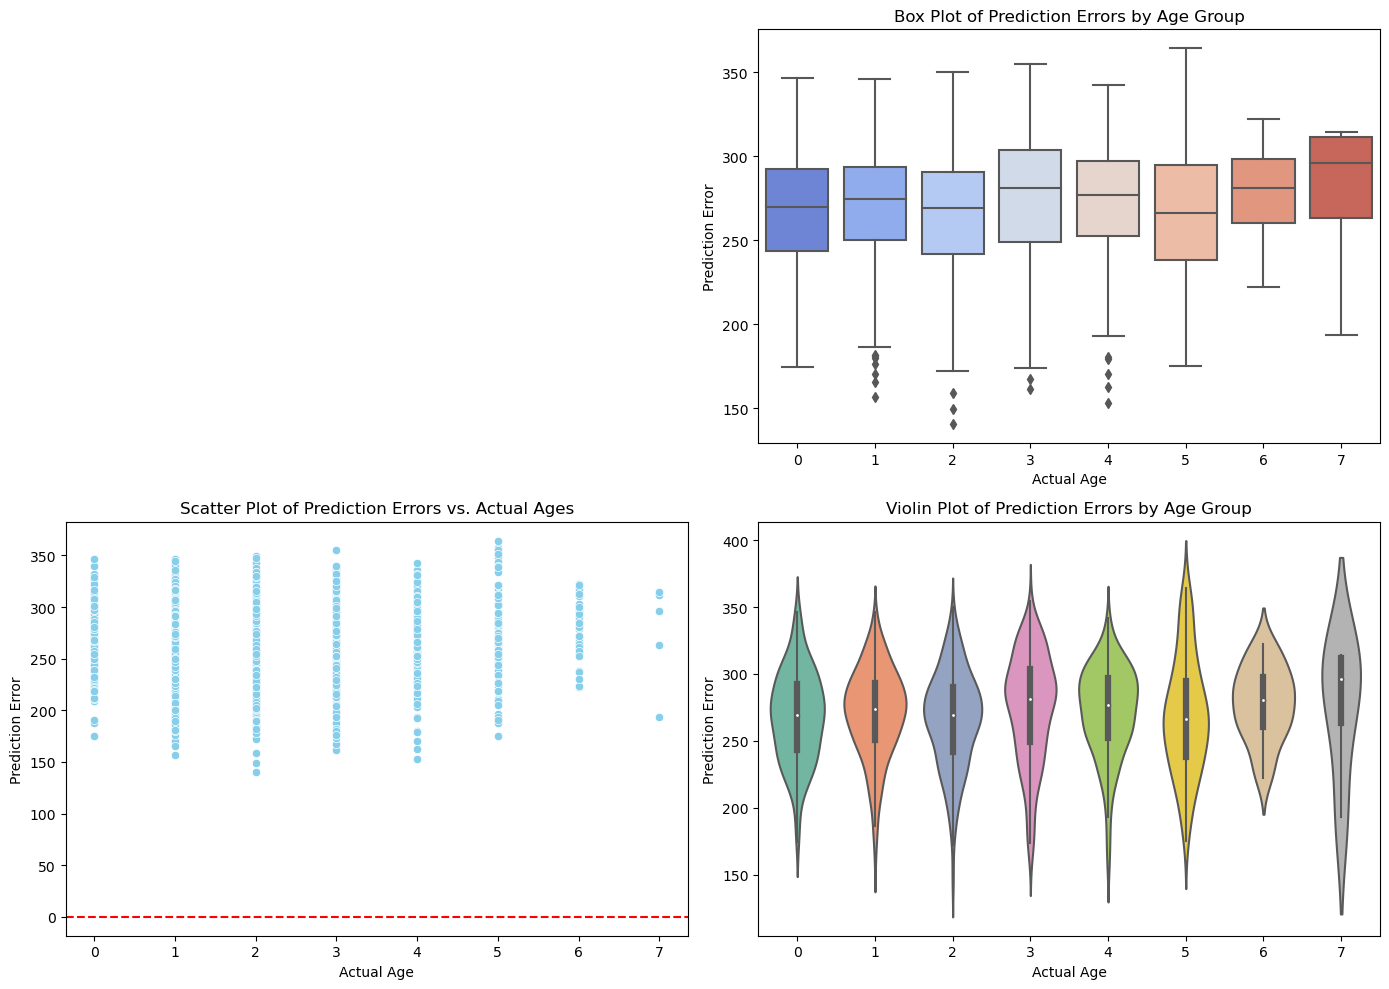

In [68]:
# Import seaborn for enhanced visualization
import seaborn as sns

# Calculate prediction errors
prediction_errors = new_predictions - new_labels

# Create a DataFrame for visualization
viz_df = pd.DataFrame({
    'Actual Age': new_labels,
    'Predicted Age': new_predictions,
    'Prediction Error': prediction_errors
})

# Set up the visualization layout
plt.figure(figsize=(14, 10))
# Box Plot of Prediction Errors by Age Group
plt.subplot(2, 2, 2)
sns.boxplot(data=viz_df, x='Actual Age', y='Prediction Error', palette='coolwarm')
plt.title('Box Plot of Prediction Errors by Age Group')
plt.xlabel('Actual Age')
plt.ylabel('Prediction Error')

# Scatter Plot of Prediction Errors vs. Actual Ages
plt.subplot(2, 2, 3)
sns.scatterplot(data=viz_df, x='Actual Age', y='Prediction Error', color='skyblue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scatter Plot of Prediction Errors vs. Actual Ages')
plt.xlabel('Actual Age')
plt.ylabel('Prediction Error')

# Violin Plot of Prediction Errors by Age Group
plt.subplot(2, 2, 4)
sns.violinplot(data=viz_df, x='Actual Age', y='Prediction Error', palette='Set2')
plt.title('Violin Plot of Prediction Errors by Age Group')
plt.xlabel('Actual Age')
plt.ylabel('Prediction Error')

# Show plots
plt.tight_layout()
plt.show()
